In [1]:
import numpy as np


In [2]:
def u(x):
    return x * np.power((1 - x), 2)

In [3]:

grid_x = np.linspace(0, 1, 100)
grid_t = np.linspace(0, 10, 1000)
r = (grid_t[1] - grid_t[0])/(2 * np.power((grid_x[1] - grid_x[0]), 2))


In [4]:
def create_matrix(grid, r):  
    matrix = []
    C = np.zeros(len(grid))
    A = np.zeros(len(grid))
    B = np.zeros(len(grid))
    for i in range(len(grid)):
     
        if i == 0:
            B[i] = 1  
        elif i == len(grid)-1:
            
            B[i] = 1
        else:
            A[i] = -r
            B[i] = 1 + 2 * r
            C[i] = -r

    
    return A, B, C


In [5]:
res_f = u(grid_x)
res_f[0] = 0
res_f[-1] = 0 
def create_resvec(res_f, r):
    res = np.zeros(len(res_f))
    for i in range(1, len(res_f) - 1):
        res[i] = r * res_f[i-1] + (1 - 2*r)*res_f[i] + r * res_f[i+1]
    return res
F = create_resvec(res_f, r)

        

In [6]:
A, B,C = create_matrix(grid_x, r)


In [7]:
def tridiagonal_matrix_algoritm(A, B, C, F):
    alpha = np.zeros(len(A))
    beta = np.zeros(len(alpha))
    
    alpha[1] = -C[0]/B[0]
    beta[1] = F[0]/B[0]
    for i in range(2, len(alpha)):
        alpha[i] = -C[i-1]/(A[i-1] * alpha[i-1] + B[i-1])
        beta[i] = (F[i - 1] - A[i - 1] * beta[i - 1])/(A[i - 1] * alpha[i - 1] + B[i - 1])
    return alpha, beta

In [8]:
def finding_x(alpha, beta, F, A,B,C):
    x = np.zeros_like(alpha)

    x[-1] = (F[-1] - A[-1] * beta[-1])/(B[-1] + A[-1] * alpha[-1])
    for i in range(len(alpha)-2, -1, -1):
        x[i] = alpha[i+1] * x[i+1] + beta[i+1]
    return x

In [9]:
alpha, beta = tridiagonal_matrix_algoritm(A, B,C, F)
new_res = finding_x(alpha, beta, F, A,B,C)

In [10]:
new_res

array([0.        , 0.00518136, 0.01066851, 0.01637354, 0.02222105,
       0.02814648, 0.0340947 , 0.0400187 , 0.04587857, 0.0516405 ,
       0.05727603, 0.06276127, 0.06807635, 0.07320487, 0.07813342,
       0.08285118, 0.08734963, 0.09162217, 0.09566391, 0.09947144,
       0.10304262, 0.10637641, 0.10947274, 0.11233236, 0.11495676,
       0.11734804, 0.11950884, 0.12144228, 0.12315188, 0.12464152,
       0.12591538, 0.12697791, 0.12783378, 0.12848788, 0.12894525,
       0.1292111 , 0.12929074, 0.12918963, 0.12891329, 0.12846736,
       0.12785751, 0.12708952, 0.12616918, 0.12510236, 0.12389494,
       0.12255286, 0.12108206, 0.11948853, 0.11777827, 0.11595729,
       0.11403161, 0.11200726, 0.1098903 , 0.10768675, 0.10540266,
       0.10304407, 0.10061702, 0.09812752, 0.09558159, 0.09298522,
       0.09034438, 0.08766504, 0.08495311, 0.08221448, 0.079455  ,
       0.07668047, 0.07389664, 0.0711092 , 0.06832375, 0.06554581,
       0.06278082, 0.06003408, 0.05731078, 0.05461594, 0.05195

In [11]:
alpha, beta = tridiagonal_matrix_algoritm(A,B,C,new_res)
new_res = finding_x(alpha, beta, new_res, A,B,C)

In [12]:
new_res

array([0.        , 0.00529514, 0.01059259, 0.0158885 , 0.02117452,
       0.0264392 , 0.03166909, 0.03684952, 0.04196535, 0.0470014 ,
       0.05194288, 0.05677565, 0.06148639, 0.06606279, 0.0704936 ,
       0.07476866, 0.07887895, 0.08281657, 0.08657468, 0.09014749,
       0.09353023, 0.09671906, 0.09971101, 0.10250396, 0.10509656,
       0.10748815, 0.10967873, 0.11166893, 0.11345989, 0.11505327,
       0.11645118, 0.11765617, 0.11867112, 0.11949929, 0.12014421,
       0.12060973, 0.1208999 , 0.12101901, 0.12097156, 0.12076222,
       0.12039579, 0.11987726, 0.1192117 , 0.11840431, 0.11746037,
       0.11638526, 0.11518442, 0.11386335, 0.11242761, 0.1108828 ,
       0.10923453, 0.10748848, 0.1056503 , 0.10372569, 0.10172033,
       0.09963991, 0.09749009, 0.09527652, 0.09300483, 0.09068062,
       0.08830942, 0.08589674, 0.08344802, 0.08096861, 0.0784638 ,
       0.07593879, 0.07339865, 0.07084837, 0.06829277, 0.06573653,
       0.06318419, 0.06064006, 0.05810829, 0.05559278, 0.05309

In [13]:
result_matrix = []
for i in range(len(grid_t)):
    if i == 0:
        alpha, beta = tridiagonal_matrix_algoritm(A, B,C, F)
        new_res = finding_x(alpha, beta, F, A,B,C)
    else:
        alpha, beta = tridiagonal_matrix_algoritm(A, B,C, new_res)
        new_res = finding_x(alpha, beta, new_res, A,B,C)
    result_matrix.append(new_res)

In [14]:
np.array(result_matrix).shape

(1000, 100)

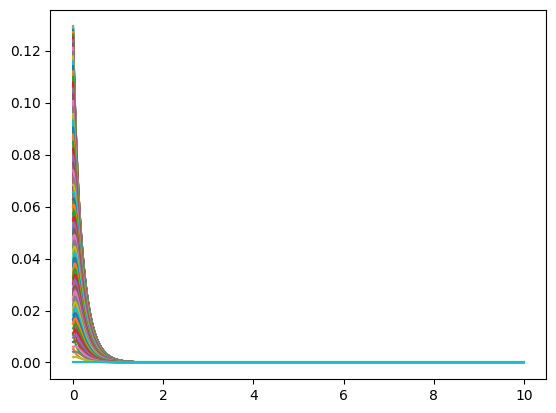

In [15]:
import matplotlib.pyplot as plt
plt.plot(grid_t, result_matrix)

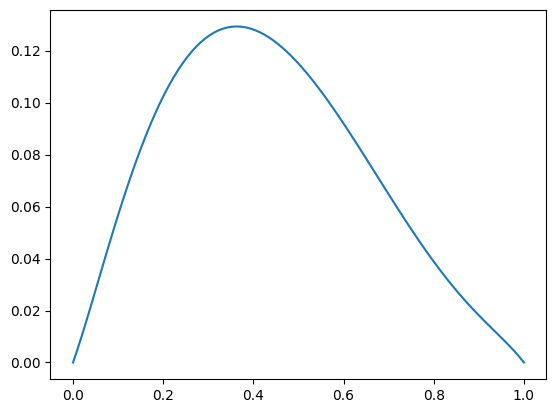

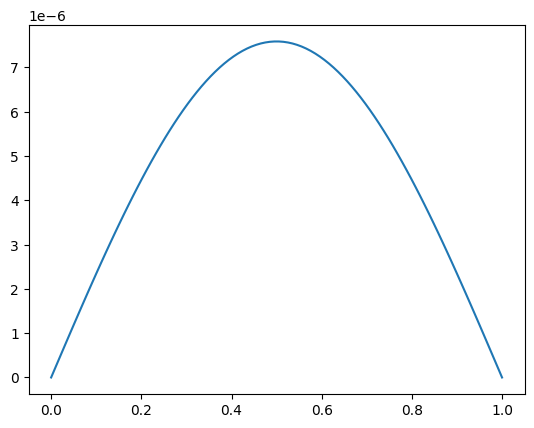

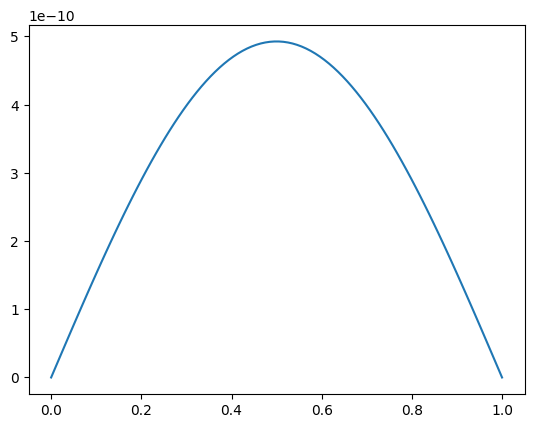

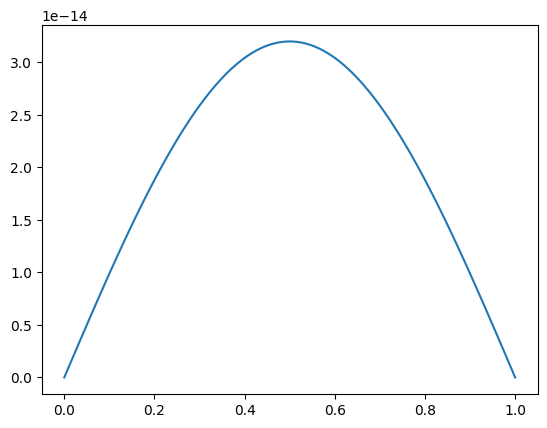

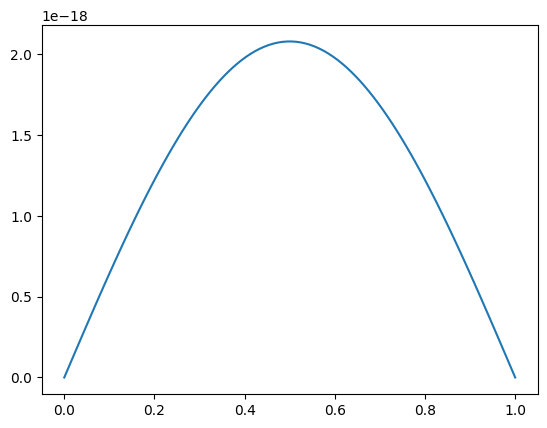

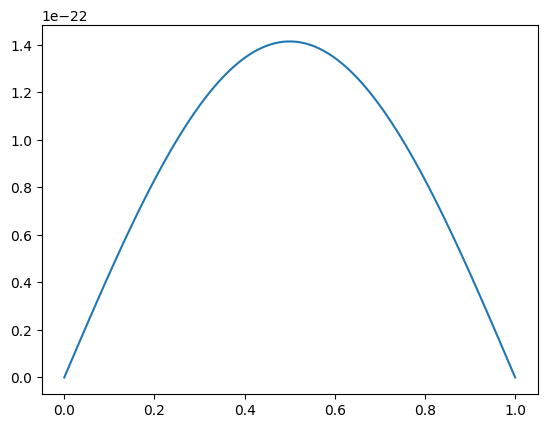

In [16]:
k = [result_matrix[0], result_matrix[200], result_matrix[400], result_matrix[600], result_matrix[800], result_matrix[999]]
x = [0, 2, 4, 6,8,10]
for i in k:
    plt.plot(grid_x, i)
    plt.show()
    plt.close()

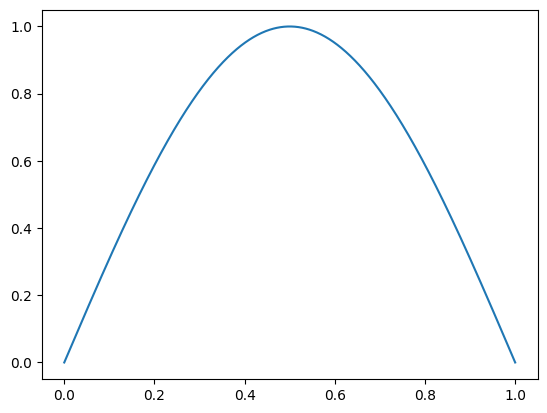

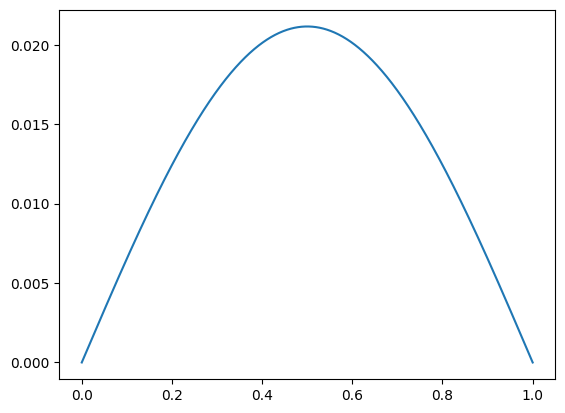

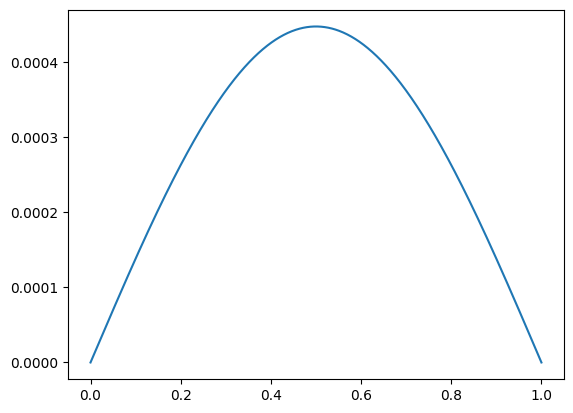

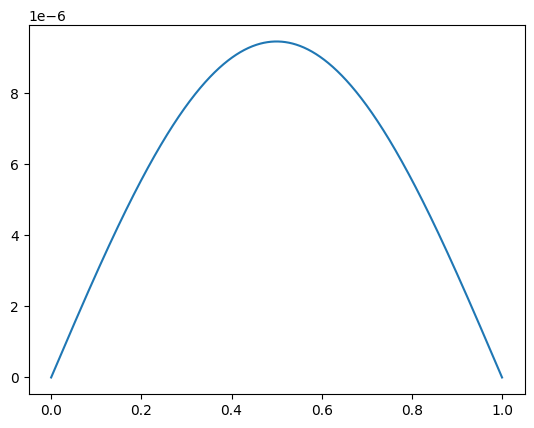

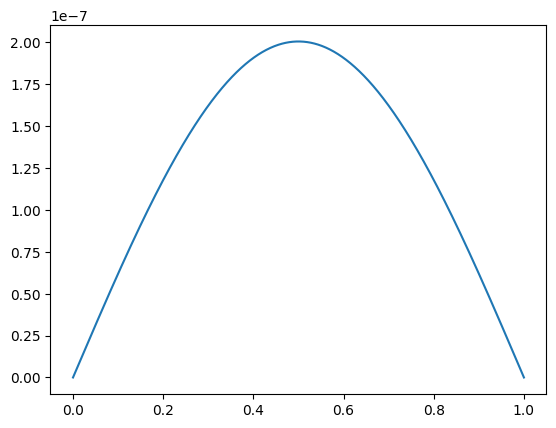

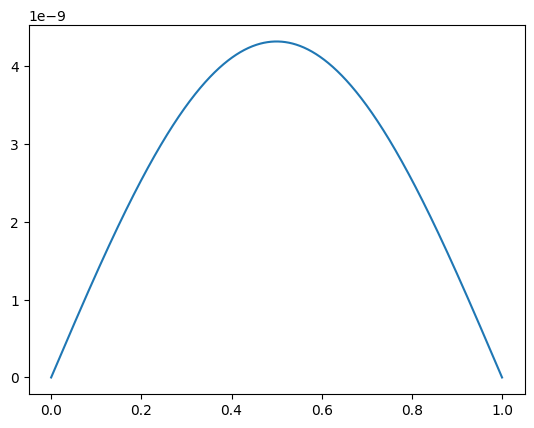

In [25]:
def new_f(x, t):
    return np.sin(np.pi * x) * np.exp(- (np.pi**2) * t)
ans12 = [new_f(grid_x, grid_t[0]), new_f(grid_x, grid_t[200]), new_f(grid_x, grid_t[400]), new_f(grid_x, grid_t[600]), new_f(grid_x, grid_t[800]), new_f(grid_x, grid_t[999])]

for i in ans12:
    plt.plot(grid_x, i)
    plt.show()
    plt.close()

In [17]:
t = 10
prev_matrix = []
res = []
for j in range(7):
    t *= 2
    grid_x = np.linspace(0, 1, t)
    grid_t = np.linspace(0, 10, 1000)
    r = (grid_t[1] - grid_t[0])/(2 * np.power((grid_x[1] - grid_x[0]), 2))
    res_f = u(grid_x)
    res_f[0] = 0
    res_f[-1] = 0 
    A, B,C = create_matrix(grid_x, r)
    F = create_resvec(res_f, r)
    result_matrix = []
    for i in range(len(grid_t)):
        if i == 0:
            alpha, beta = tridiagonal_matrix_algoritm(A, B,C, F)
            new_res = finding_x(alpha, beta, F, A,B,C)
        else:
            alpha, beta = tridiagonal_matrix_algoritm(A, B,C, new_res)
            new_res = finding_x(alpha, beta, new_res, A,B,C)
        result_matrix.append(max(new_res))
    if j != 0:
        res.append(np.max(np.array(result_matrix) - np.array(prev_matrix)))
    prev_matrix = result_matrix



In [18]:
ans = []
for i in range(1, len(res)):
    ans.append(np.log2(res[i]/res[i-1]))
ans

[-1.8828269556880624,
 -1.652338432498138,
 -2.7220884216519643,
 -2.373416921350102,
 -1.9770770770685167]

In [39]:
t = 10
prev_matrix = []
result_matrix = []
res = []
for j in range(9):
    t *= 2
    grid_x = np.linspace(0, 1, 100)
    grid_t = np.linspace(0, 1, t)
    r = (grid_t[1] - grid_t[0])/(2 * np.power((grid_x[1] - grid_x[0]), 2))
    res_f = u(grid_x)
    res_f[0] = 0
    res_f[-1] = 0 
    A, B,C = create_matrix(grid_x, r)
    F = create_resvec(res_f, r)
    result_matrix = []
    for i in range(len(grid_t)):
        if i == 0:
            alpha, beta = tridiagonal_matrix_algoritm(A, B,C, F)
            new_res = finding_x(alpha, beta, F, A,B,C)
        else:
            alpha, beta = tridiagonal_matrix_algoritm(A, B,C, new_res)
            new_res = finding_x(alpha, beta, new_res, A,B,C)
        result_matrix.append(new_res)
    if j != 0:
        res.append(np.max(np.array(result_matrix[-1]) - np.array(prev_matrix[-1])))
    prev_matrix = result_matrix

res
    




[1.669923006615971e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [40]:
ans = []
for i in range(1, len(res)):
    ans.append(np.log2(res[i]/res[i-1]))
ans

/tmp/ipykernel_5840/3745997912.py:3: RuntimeWarning: divide by zero encountered in log2
  ans.append(np.log2(res[i]/res[i-1]))
/tmp/ipykernel_5840/3745997912.py:3: RuntimeWarning: invalid value encountered in double_scalars
  ans.append(np.log2(res[i]/res[i-1]))


[-inf, nan, nan, nan, nan, nan, nan]

In [41]:
t

5120

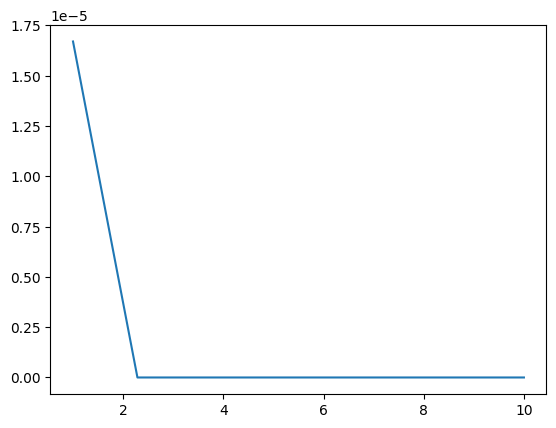

In [44]:
plt.plot(np.linspace(1,10, len(res)), res)

In [45]:
result_matrix[-1] - prev_matrix[-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

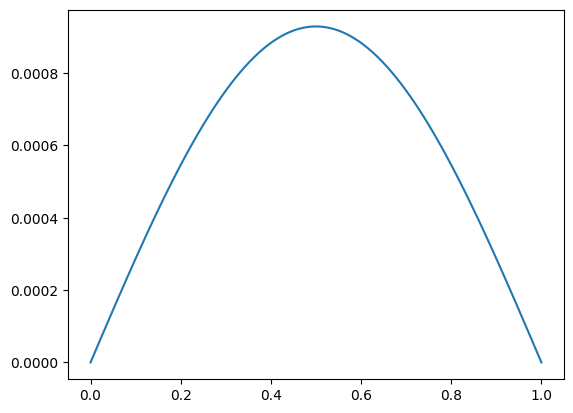

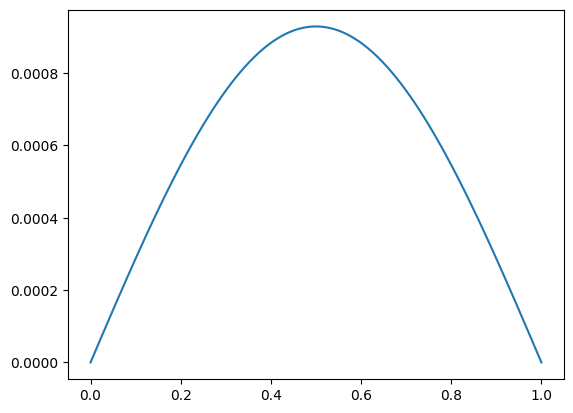

In [43]:
new_res_plot = [result_matrix[-1], prev_matrix[-1]]
for i in new_res_plot:
    plt.plot(np.linspace(0, 1, 100), i)
    plt.show()
    plt.close()
    

In [29]:
ans = []
for i in range(1, len(res)):
    ans.append(np.log2(res[i]/res[i-1]))
ans

[0.1543560841847943,
 -0.10543020855359643,
 -0.3144654253207368,
 -0.4905684602268344,
 -0.6412643806056602,
 -0.7522658366946069,
 -0.8248958554745657,
 -0.8745294822522727,
 -0.9092239082615394,
 -0.9331771222441393,
 -0.9513423950209636]

In [30]:
grid_t.shape

(81920,)

In [31]:
np.array(result_matrix).shape

(81920, 100)

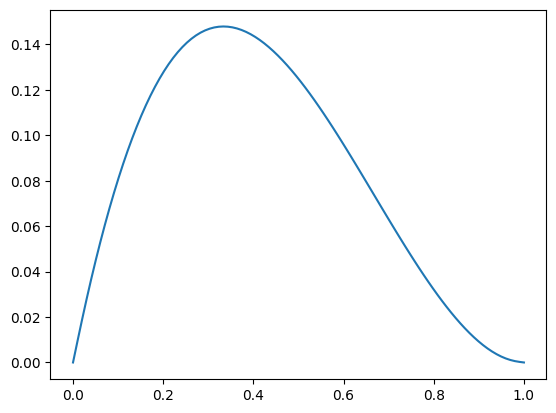

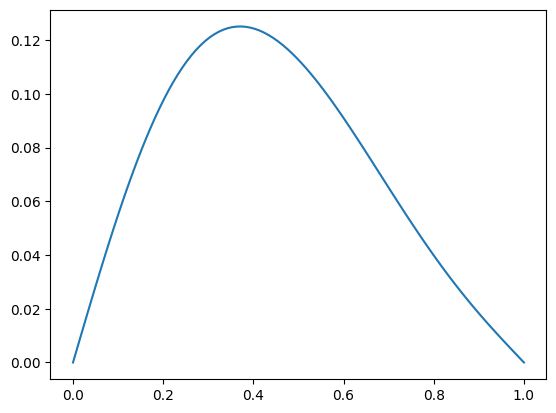

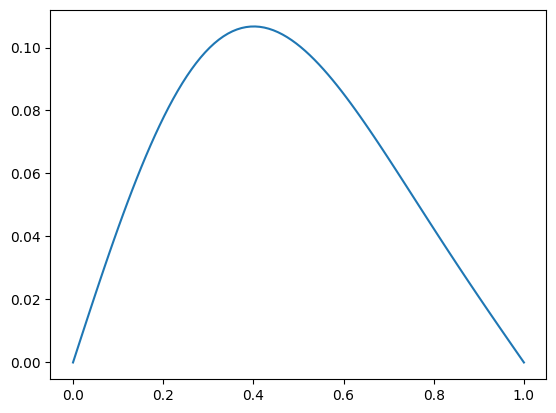

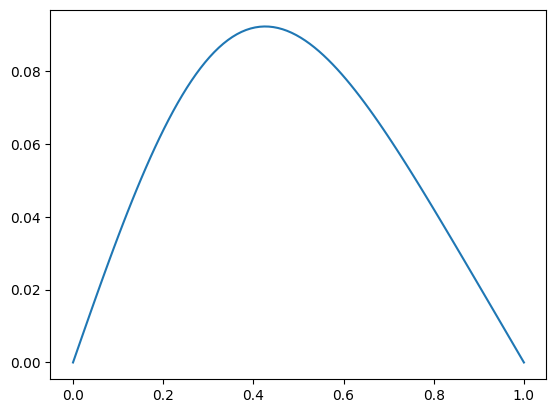

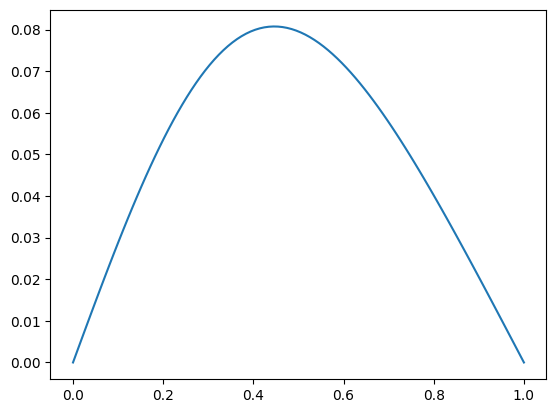

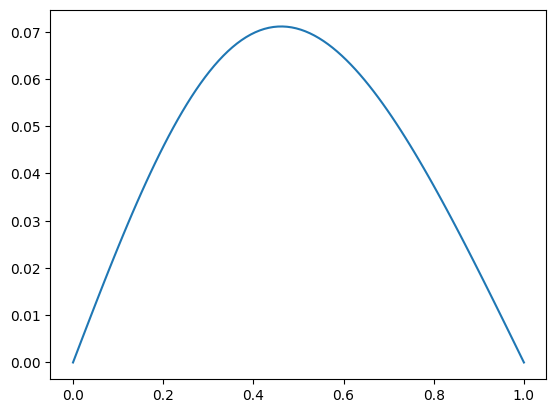

In [32]:
k = [result_matrix[0], result_matrix[200], result_matrix[400], result_matrix[600], result_matrix[800], result_matrix[999]]
t = [0, 2, 4, 6,8,10]
for i in k:
    plt.plot(grid_x, i)
    plt.show()
    plt.close()

In [33]:
res

[0.04404102842763988,
 0.0490143517588227,
 0.04556019854541255,
 0.03663718372728892,
 0.026076317539123484,
 0.016718851766156118,
 0.00992548793209698,
 0.005603165751675396,
 0.003056144352246576,
 0.0016273096298656947,
 0.0008522281776339527,
 0.00044073068894592837]

In [271]:
ans = []
for i in range(1, len(res)):
    ans.append(np.log2(res[i]/res[i-1]))
ans

/tmp/ipykernel_9383/3745997912.py:3: RuntimeWarning: divide by zero encountered in log2
  ans.append(np.log2(res[i]/res[i-1]))
/tmp/ipykernel_9383/3745997912.py:3: RuntimeWarning: invalid value encountered in double_scalars
  ans.append(np.log2(res[i]/res[i-1]))


[-8.879357022753796,
 -10.871567847817671,
 -12.21435954289174,
 -inf,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [272]:
x = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
x[::2]

[[1, 2, 3], [7, 8, 9]]

In [273]:
len(res_f)

10

In [274]:
grid_t
for i in range(len(grid_t)):
    if i == 0:
        alpha, beta = tridiagonal_matrix_algoritm(A, B,C, F)
        new_res = finding_x(alpha, beta, F, A,B,C)
    else:
        alpha, beta = tridiagonal_matrix_algoritm(A, B,C, new_res)
        new_res = finding_x(alpha, beta, new_res, A,B,C)
    result_matrix.append(max(new_res))

AttributeError: 'numpy.ndarray' object has no attribute 'append'